In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Dataset**

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:01<00:00, 126MB/s]
100% 163M/163M [00:01<00:00, 103MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_578.jpg', 'with_mask_1242.jpg', 'with_mask_1946.jpg', 'with_mask_3639.jpg', 'with_mask_2130.jpg']
['with_mask_345.jpg', 'with_mask_3249.jpg', 'with_mask_1565.jpg', 'with_mask_312.jpg', 'with_mask_3554.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1619.jpg', 'without_mask_889.jpg', 'without_mask_3002.jpg', 'without_mask_2393.jpg', 'without_mask_1294.jpg']
['without_mask_758.jpg', 'without_mask_3047.jpg', 'without_mask_223.jpg', 'without_mask_1421.jpg', 'without_mask_242.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

---

with mask --> 1

without mask --> 0



In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying Images**

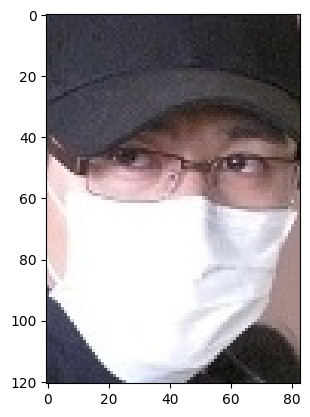

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_45.jpg')
imgplot = plt.imshow(img)
plt.show()

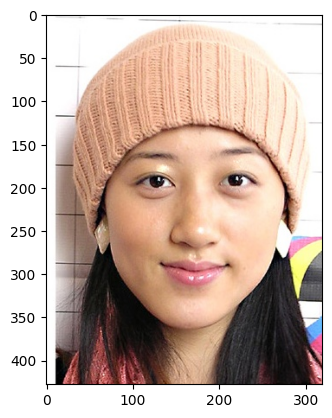

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

---

Resize the Images

Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[254, 255, 237],
        [252, 253, 236],
        [254, 254, 236],
        ...,
        [ 70,  35,  21],
        [ 68,  35,  20],
        [ 61,  31,  15]],

       [[253, 254, 239],
        [253, 254, 239],
        [254, 254, 238],
        ...,
        [ 70,  34,  20],
        [ 69,  36,  21],
        [ 61,  32,  16]],

       [[253, 254, 241],
        [254, 255, 241],
        [254, 255, 241],
        ...,
        [ 69,  33,  19],
        [ 71,  37,  22],
        [ 61,  30,  14]],

       ...,

       [[167, 160, 207],
        [155, 152, 201],
        [148, 146, 195],
        ...,
        [111,  49,  33],
        [110,  46,  29],
        [103,  40,  23]],

       [[163, 158, 206],
        [152, 150, 200],
        [136, 134, 185],
        ...,
        [114,  50,  35],
        [106,  42,  25],
        [104,  42,  25]],

       [[156, 153, 201],
        [139, 138, 189],
        [122, 120, 174],
        ...,
        [113,  47,  32],
        [110,  46,  30],
        [110,  47,  31]]], dtype=uint8)
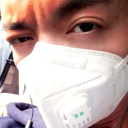

In [ ]:
data[0]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[237, 230, 222],
        [236, 229, 221],
        [236, 229, 221],
        ...,
        [211, 206, 194],
        [206, 201, 189],
        [210, 209, 200]],

       [[238, 231, 223],
        [238, 231, 223],
        [237, 230, 222],
        ...,
        [208, 202, 189],
        [209, 203, 190],
        [210, 208, 198]],

       [[236, 231, 222],
        [237, 232, 224],
        [237, 232, 223],
        ...,
        [208, 201, 189],
        [207, 200, 187],
        [212, 208, 200]]], dtype=uint8)
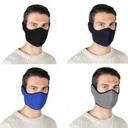

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.92941176, 0.90196078, 0.87058824],
        [0.9254902 , 0.89803922, 0.86666667],
        [0.9254902 , 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 12s 25ms/step - loss: 0.4455 - acc: 0.8166 - val_loss: 0.2559 - val_acc: 0.9041
Epoch 2/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2822 - acc: 0.8926 - val_loss: 0.2386 - val_acc: 0.9008
Epoch 3/10
170/170 [==============================] - 3s 19ms/step - loss: 0.2256 - acc: 0.9126 - val_loss: 0.4157 - val_acc: 0.8678
Epoch 4/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2130 - acc: 0.9176 - val_loss: 0.2133 - val_acc: 0.9107
Epoch 5/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1686 - acc: 0.9376 - val_loss: 0.2553 - val_acc: 0.9124
Epoch 6/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1432 - acc: 0.9470 - val_loss: 0.2714 - val_acc: 0.9074
Epoch 7/10
170/170 [==============================] - 3s 20ms/step - loss: 0.1162 - acc: 0.9586 - val_loss: 0.2522 - val_acc: 0.9174
Epoch 8/10
170/170 [==============================] - 3s 17ms/step -

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2574 - acc: 0.9279
Test Accuracy = 0.9278623461723328


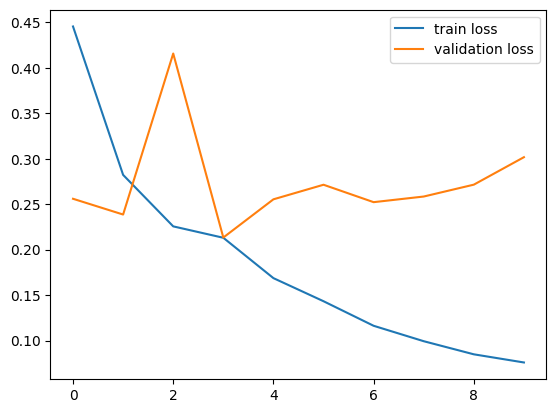

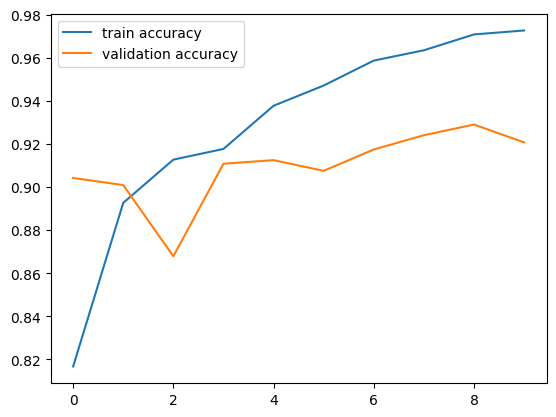

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

***Predictive System***

Path of the image to be predicted: /content/test.jpg


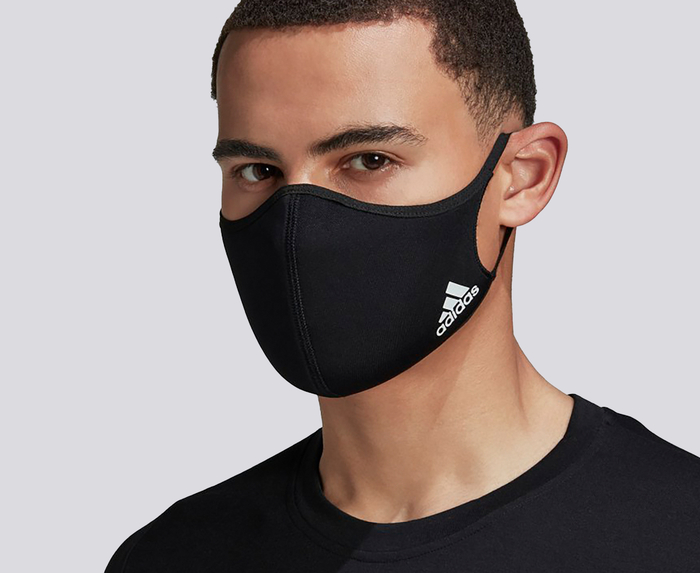

1/1 [==============================] - 0s 354ms/step
[[0.07471895 0.73568434]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test2.jpg


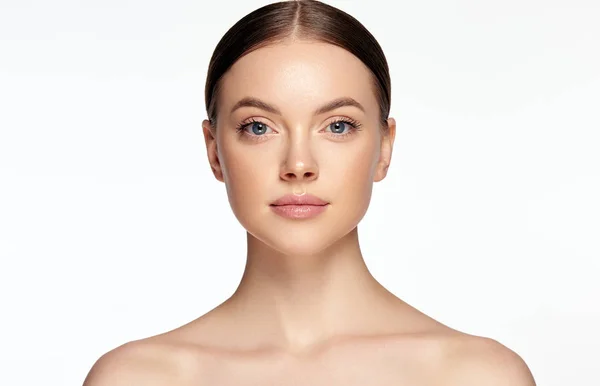

1/1 [==============================] - 0s 18ms/step
[[0.4928729  0.42251697]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')